![title](UCN.png)

 #  <font color=blue> Optimización con Python & Cplex - Transporte </font>

<div class="alert alert-info"> </h4> Material preparado para la carrera de Ingeniería Civil Industrial | Universidad Católica del Norte | Escuela de Ingeniería - Campus Coquimbo | Curso - Cadena de Suministros.                                                                          
© Sergio Correa Santis, Ingenerio Industrial UCN, Master of International Business UQ, Master Engeneering of Supply Chain and Logistics, MIT ZLC-Global Scale.                               Contacto: sergio.correa@ucn.cl o sergio.correa.santis@gmail.com
</h4> </div>

## Modelo de Transporte

El modelo de transporte es una clase especial de programación lineal que tiene que ver con transportar un artículo desde sus fuentes hasta sus destinos. El objetivo es determinar el programa de transporte que minimice el costo total del transporte y que al mismo tiempo satisfaga los límites de la oferta y la demanda. En el modelo se supone que el costo de transporte es proporcional a la cantidad de unidades transportadas en determinada ruta.
**En general, se puede ampliar el modelo de transporte a otras áreas de operación, entre otras el control de inventarios, programación de empleos y asignación de personal.**

<img src="transporte.png" width="400" height="400" />

El problema general se representa en la red de la figura anterior. Hay n fuentes y m destinos, cada fuente y cada destino están representados por un **nodo**. Los **arcos representan las rutas que enlazan las fuentes y los destinos**. El **arco (i, j)** que une a la fuente i con el destino j conduce dos clases de información: el costo de transporte $c_{ij}$ por unidad, y la cantidad transportada $x_{ij}$. La cantidad de oferta en la fuente i es $s_i$ y la cantidad de demanda en el destino j es $d_j$. El objetivo del modelo es determinar las incógnitas $x_{ij}$ que minimicen el costo total de transporte, y que al mismo tiempo satisfagan las restricciones de oferta y demanda.

### El Modelo de Programación Lineal

$Min \; Z= \; \displaystyle\sum_{i=1}^{n}\sum_{j=1}^{m} x_{ij}c_{ij}$

$\displaystyle\sum_{j=1}^{m}x_{ij}\leq s_i$     $\; \; \forall \;i \; \in \; n$

$\displaystyle\sum_{i=1}^{n}x_{ij}\geq d_j$     $\; \; \forall \;j \; \in \; m$

Es importante recordar que para que el problema tenga una solución factible  se debe cumplir la condición de que la oferta disponible o la capacidad disponible sea igual a la demanda $\displaystyle\sum_{i=1}^{n}s_{i}=\displaystyle\sum_{j=1}^{m}d_{i}$.En el caso de que esto no se cumpla se puede utilizar nodos ficticios.

### El probelma
Colum es un popular fabricante de yogur griego en Chile. La compañía tiene instalaciones de producción en Osorno, Valdivia y Puerto Fuy, que pueden producir 10.000 yogurts por semana.

Uno de los principales clientes de Colum, un supermercado llamado Diler, el cual ha realizado un pedido grande. Diler distribuye su pedido en sus 3 instalaciones ubicadas en Puerto Montt, Temuco y Villarica. 

Colum junto con llevar toda la magia del sur a su casa, quiere minimizar sus costos de transporte mientras satisface el pedido de Diler.

Los costos de transporte entre cada instalación, la capacidad de producción y la demanda de cada destinos están en las tablas a continuación.
#### Capacidad de Producción  por Plantas ($s_i$)

|Osorno|Valdivía|Puerto Fuy|
|------|------|------|
|10,000  |10,000  |10,000  | 

#### Demanda de por Supermercado ($d_i$)

|Puerto Montt|Temuco|Villarica|
|------|------|------|
|11,000  |6,300  |7,400  | 

#### Costo de Transporte ($c_{ij}$)

| |Puerto Montt|Temuco|Villarica|
|-|------|------|------|
|Osorno|1.04  |1.27  |1.22  | 
|Valdivia|1.23  |1.93  |0.6  | 
|Puerto Fuy|1.92  |0.94  |1.03  | 

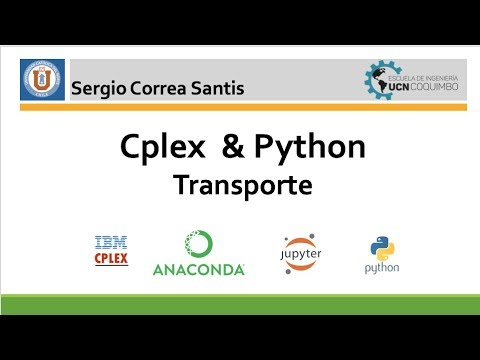

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('76lkfafuY4U')

In [2]:
plantas=[k for k in range(3)]
print(plantas)

destinos=[k for k in range(3)]
print(destinos)

[0, 1, 2]
[0, 1, 2]


In [3]:
Arcos =[(i,j) for i in plantas for j in destinos]
Arcos

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [4]:
# Creando los diccionarios a utilizar en el modelo

Capacidad={0: 10000, 1: 10000, 2: 10000}
Demanda={0: 11000, 1: 6300, 2: 7400}
Costos={(0, 0): 1.04, (0, 1): 1.27, (0, 2): 1.22, (1, 0): 1.23, 
        (1, 1): 1.93, (1, 2): 0.6, (2, 0): 1.92, (2, 1): 0.94, (2, 2): 1.03}

In [5]:
from docplex.mp.model import Model
import docplex.mp.solution as Solucion

mdl=Model('Transp')

In [6]:
#Variable entera de cantidad a producir
x=mdl.integer_var_dict(Arcos,name='x')

In [7]:
#Función objetivo
mdl.minimize(mdl.sum(x[i]*Costos[i] for i in Arcos))

In [8]:
# Primero restricción de capacidad
for k in plantas:
    mdl.add_constraint(mdl.sum(x[(k,j)] for j in Demanda)<=Capacidad[k])

In [9]:
# Segundo restricción de demanda
for k in Demanda:
    mdl.add_constraint(mdl.sum(x[(i,k)] for i in Capacidad)>=Demanda[k])

In [10]:
print(mdl.export_to_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Transp

Minimize
 obj: 1.040000000000 x_(0,_0) + 1.270000000000 x_(0,_1)
      + 1.220000000000 x_(0,_2) + 1.230000000000 x_(1,_0)
      + 1.930000000000 x_(1,_1) + 0.600000000000 x_(1,_2)
      + 1.920000000000 x_(2,_0) + 0.940000000000 x_(2,_1)
      + 1.030000000000 x_(2,_2)
Subject To
 c1: x_(0,_0) + x_(0,_1) + x_(0,_2) <= 10000
 c2: x_(1,_0) + x_(1,_1) + x_(1,_2) <= 10000
 c3: x_(2,_0) + x_(2,_1) + x_(2,_2) <= 10000
 c4: x_(0,_0) + x_(1,_0) + x_(2,_0) >= 11000
 c5: x_(0,_1) + x_(1,_1) + x_(2,_1) >= 6300
 c6: x_(0,_2) + x_(1,_2) + x_(2,_2) >= 7400

Bounds

Generals
 x_(0,_0) x_(0,_1) x_(0,_2) x_(1,_0) x_(1,_1) x_(1,_2) x_(2,_0) x_(2,_1)
 x_(2,_2)
End



In [11]:
solucion = mdl.solve(log_output=True)

CPXPARAM_Read_DataCheck                          1
Found incumbent of value 30250.000000 after 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
Reduced MIP has 6 rows, 9 columns, and 18 nonzeros.
Reduced MIP has 0 binaries, 9 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (0.01 ticks)
Tried aggregator 1 time.
Reduced MIP has 6 rows, 9 columns, and 18 nonzeros.
Reduced MIP has 0 binaries, 9 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (0.01 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.
Root relaxation solution time = 0.00 sec. (0.01 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                        30250.0000        0.0000           100.00%
*     0     0      integral     0    21992.0000    21992.0000        3    0.00%
Elapsed time = 0.08 sec.

In [12]:
mdl.get_solve_status()

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [13]:
solucion.display()

solution for: Transp
objective: 21992.000
x_(0, 0) = 10000
x_(1, 0) = 1000
x_(1, 2) = 7400
x_(2, 1) = 6300


<img src="00 solucion 1.png" width="400" height="400" />

Ahora, realizaremos el mismo ejercicio pero leyendo los datos desde un archivo excel.

## Leyendo la información desde Excel

Ahora resolveremos el mismo ejercicio, pero en vez de crear nosotros los datos, los leeremos desde excel. Para esto utilizaremos la librería **pandas**. Con esta librería importaremos los datos desde excel y los importaremos a un **DataFrame**. Despues de esto, leeremos los datos desde el Dataframe y creamos las mismas estructuras de datos ( diccionarios) como en el ejemplo anterior.

In [14]:
import pandas as pd

In [15]:
excel=pd.ExcelFile('Transporte_ejemplo.xlsx')
demanda =pd.read_excel(excel,'Demanda')
produccion =pd.read_excel(excel,'Produccion')
costos =pd.read_excel(excel,'Costos')

In [16]:
demanda.head()

,Destinos,Demanda de Containers
0,Puerto Montt,11000
1,Temuco,6300
2,Villarica,7400


In [17]:
produccion

,Planta,Capacidad de Produccion
0,Osorno,10000
1,Valdivia,10000
2,Puerto Fuy,10000


In [18]:
costos

,Planta de producción,Destination de la Producción,Costo de Envio
0,Osorno,Puerto Montt,1.04
1,Osorno,Temuco,1.27
2,Osorno,Villarica,1.22
3,Valdivia,Puerto Montt,1.23
4,Valdivia,Temuco,1.93
5,Valdivia,Villarica,0.60
6,Puerto Fuy,Puerto Montt,1.92
7,Puerto Fuy,Temuco,0.94
8,Puerto Fuy,Villarica,1.03


## Transformar datos a Diccionarios 

In [19]:
plantas=[k for k in range(len(produccion))]
print(plantas)
destinos=[k for k in range(len(demanda))]
print(destinos)

[0, 1, 2]
[0, 1, 2]


In [20]:
Arcos =[(i,j) for i in plantas for j in destinos]
Arcos

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [21]:
Demanda = {k: row['Demanda de Containers'] for k, row in demanda.iterrows()}
Demanda

{0: 11000, 1: 6300, 2: 7400}

In [22]:
Produccion = {k: row['Capacidad de Produccion'] for k, row in produccion.iterrows()}
Produccion

{0: 10000, 1: 10000, 2: 10000}

In [23]:
Costos_1 = {k: row['Costo de Envio'] for k, row in costos.iterrows()}
Costos_1

{0: 1.04,
 1: 1.27,
 2: 1.22,
 3: 1.23,
 4: 1.93,
 5: 0.6,
 6: 1.92,
 7: 0.94,
 8: 1.03}

In [24]:
Costos={Arcos[k]:Costos_1[k] for k in Costos_1}
print(Costos)

{(0, 0): 1.04, (0, 1): 1.27, (0, 2): 1.22, (1, 0): 1.23, (1, 1): 1.93, (1, 2): 0.6, (2, 0): 1.92, (2, 1): 0.94, (2, 2): 1.03}


In [25]:
from docplex.mp.model import Model
import docplex.mp.solution as Solucion

mdl=Model('Transp')

In [26]:
#Variable entera de cantidad a producir
x=mdl.integer_var_dict(Arcos,name='x')

In [27]:
#Función objetivo
mdl.minimize(mdl.sum(x[i]*Costos[i] for i in Arcos))

In [28]:
# Primero restricción de capacidad
for k in plantas:
    mdl.add_constraint(mdl.sum(x[(k,j)] for j in Demanda)<=Produccion[k])

In [29]:
# Segundo restricción de demanda
for k in Demanda:
    mdl.add_constraint(mdl.sum(x[(i,k)] for i in Produccion)>=Demanda[k])

In [30]:
print(mdl.export_to_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Transp

Minimize
 obj: 1.040000000000 x_(0,_0) + 1.270000000000 x_(0,_1)
      + 1.220000000000 x_(0,_2) + 1.230000000000 x_(1,_0)
      + 1.930000000000 x_(1,_1) + 0.600000000000 x_(1,_2)
      + 1.920000000000 x_(2,_0) + 0.940000000000 x_(2,_1)
      + 1.030000000000 x_(2,_2)
Subject To
 c1: x_(0,_0) + x_(0,_1) + x_(0,_2) <= 10000
 c2: x_(1,_0) + x_(1,_1) + x_(1,_2) <= 10000
 c3: x_(2,_0) + x_(2,_1) + x_(2,_2) <= 10000
 c4: x_(0,_0) + x_(1,_0) + x_(2,_0) >= 11000
 c5: x_(0,_1) + x_(1,_1) + x_(2,_1) >= 6300
 c6: x_(0,_2) + x_(1,_2) + x_(2,_2) >= 7400

Bounds

Generals
 x_(0,_0) x_(0,_1) x_(0,_2) x_(1,_0) x_(1,_1) x_(1,_2) x_(2,_0) x_(2,_1)
 x_(2,_2)
End



In [31]:
solucion = mdl.solve(log_output=True)

CPXPARAM_Read_DataCheck                          1
Found incumbent of value 30250.000000 after 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
Reduced MIP has 6 rows, 9 columns, and 18 nonzeros.
Reduced MIP has 0 binaries, 9 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (0.01 ticks)
Tried aggregator 1 time.
Reduced MIP has 6 rows, 9 columns, and 18 nonzeros.
Reduced MIP has 0 binaries, 9 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (0.01 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.
Root relaxation solution time = 0.00 sec. (0.01 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                        30250.0000        0.0000           100.00%
*     0     0      integral     0    21992.0000    21992.0000        3    0.00%
Elapsed time = 0.07 sec.

In [32]:
mdl.get_solve_status()

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [33]:
solucion.display()

solution for: Transp
objective: 21992.000
x_(0, 0) = 10000
x_(1, 0) = 1000
x_(1, 2) = 7400
x_(2, 1) = 6300


<div class="alert alert-info"> </h4> Material preparado para la carrera de Ingeniería Civil Industrial | Universidad Católica del Norte | Escuela de Ingeniería - Campus Coquimbo | Curso - Cadena de Suministros.                                                                          
© Sergio Correa Santis, Ingenerio Industrial UCN, Master of International Business UQ, Master Engeneering of Supply Chain and Logistics, MIT ZLC-Global Scale.                               Contacto: sergio.correa@ucn.cl o sergio.correa.santis@gmail.com
</h4> </div>